In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import combinations, permutations

In [2]:
df = pd.read_csv('law.csv')
df.drop(df.columns.values[0], inplace=True, axis=1)
df.head()

,observation,LSAT,GPA
0,1,576,3.39
1,2,635,3.30
2,3,558,2.81
3,4,578,3.03
4,5,666,3.44


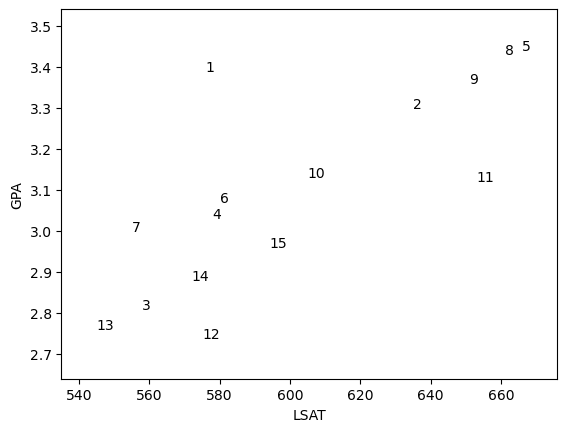

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(df['LSAT'].min()-10, df['LSAT'].max()+10)
ax.set_ylim(df['GPA'].min()-.1, df['GPA'].max()+.1)
ax.set_xlabel('LSAT')
ax.set_ylabel('GPA')
for i in range(len(df)):
    ax.annotate(df['observation'][i], (df['LSAT'][i], df['GPA'][i]))


In [16]:
def corr_fn(data, index):
    return pearsonr(data.loc[index, "LSAT"], data.loc[index, "GPA"])[0]

tmp = []
for i in range(1,15):
    tmp.append(list(enumerate(combinations(range(15), i+1))))
    
boot_stats = []
for i in range(len(tmp)):
    for j in range(len(tmp[i])):
        bootstrap_sample = df.loc[list(tmp[i][j][1]), ["LSAT", "GPA"]]
        boot_stats.append(pearsonr(bootstrap_sample["LSAT"], bootstrap_sample["GPA"])[0])
    
# Compute the bootstrap statistics
boot_mean = np.mean(boot_stats)
boot_std = np.std(boot_stats)
boot_bias = boot_mean - pearsonr(df["LSAT"], df["GPA"])[0]
boot_ci = np.percentile(boot_stats, [2.5, 97.5])

# Print the bootstrap statistics
print("Bootstrap Statistics:")
print(f"    original   bias    std. error")
print(f"t1* {pearsonr(df['LSAT'], df['GPA'])[0]:.6f} {boot_bias:.6f}  {boot_std:.6f}")
print(f"CI  {boot_ci[0]:.6f}  {boot_ci[1]:.6f}")

Bootstrap Statistics:
    original   bias    std. error
t1* 0.776374 -0.010570  0.177483
CI  0.353955  0.987496


In [14]:
boot_stats

[[-1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.5681684189371377,
  0.24854790640047938,
  0.18137934769649494,
  0.18563343491922168,
  0.5289366792626452,
  0.0844825911959814,
  -0.6076791626010947,
  -0.33160221779211224,
  -0.8830959870877025,
  0.3986352806928988,
  0.67208282745301

## exo2

In [110]:
# use gray code to generate all possible subsets of size k
def gray_code(k):
    if k == 0:
        return [0]
    lower = gray_code(k-1)
    return lower + [2**(k-1) + x for x in reversed(lower)]


boot_samples = gray_code(15)


In [114]:
k = 3

matrix = np.zeros((2**k, k))
matrix[0, :] = np.array([0 for i in range(k)])
for i in range(1, 2**k):
    matrix[i, :] = matrix[i-1, :]
    for j in range(k):
        if matrix[i, j] == 0:
            matrix[i, j] = 1
            break
        else:
            matrix[i, j] = 0
# matrix

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [118]:
# Perform the complete enumeration bootstrap with gray code
boot_samples = [np.array([i for i in range(k) if matrix[j, i] == 1]) for j in range(2**k)]
print(boot_samples)

[array([], dtype=float64), array([0]), array([1]), array([0, 1]), array([2]), array([0, 2]), array([1, 2]), array([0, 1, 2])]


TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given